In [1]:
import numpy as np
import astropy.units as u
from astropy import constants as const
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.differentiate import derivative
from scipy.interpolate import griddata

In [2]:
#problem 1:
ionization_temp = 13.6 * u.eV / const.k_B
ionization_temp.to(u.K)

<Quantity 157821.44645308 K>

In [3]:
m_H = const.m_p + const.m_e
rho = (10**(-9))*(u.g / u.cm**(3))
E_ion = 13.6*u.eV
n_max = (m_H**(1/3) / (2*rho**(1/3)*const.a0))**(1/2)
n_tot = rho / (m_H)

def saha(T):
    Z_H = 0
    n = 1
    while n <= (n_max//1):
        Z_H += 4*(n)*np.exp((-E_ion*(1-(1/n**2))/ (const.k_B*T*u.K)))
        n += 1
        # print(Z_H)
        

    C_T = (1/n_tot) * (2*np.pi*const.k_B*T*u.K / (const.h**2))**(3/2) * (const.m_p * const.m_e / m_H)**(3/2) * (4/Z_H) * np.exp(-E_ion / (const.k_B * T*u.K))

    frac = (-C_T + (C_T**2 + 4*C_T)**(1/2)) / 2
    
    return frac    

14174.174174174173


Text(0.5, 0, 'Temperature [K]')

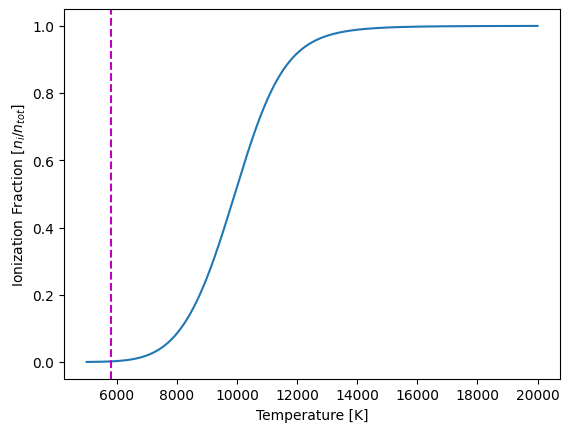

In [4]:
temp_array = np.linspace(5000, 20000, 1000)
saha_array = saha(temp_array).decompose()
saha_5800 = saha(5800)
for i in range(len(saha_array)):
    if saha_array[i] >= 0.99:
        print(temp_array[i])
        break

plt.plot(temp_array, saha_array)
plt.axvline(5800, ls="--", c="m")
plt.ylabel(r"Ionization Fraction [$n_i / n_{tot}$]")
plt.xlabel(r"Temperature [K]")

In [5]:
m_H = const.m_p + const.m_e
rho = 160*(u.g / u.cm**(3))
E_ion = 13.6*u.eV
n_max = 1
n_tot = rho / (m_H)

def saha(T):
    Z_H = 0
    n = 1
    while n <= (n_max//1):
        Z_H += 4*(n)*np.exp((-E_ion*(1-(1/n**2))/ (const.k_B*T*u.K)))
        n += 1
        print(Z_H)
        

    C_T = (1/n_tot) * (2*np.pi*const.k_B*T*u.K / (const.h**2))**(3/2) * (const.m_p * const.m_e / m_H)**(3/2) * (4/Z_H) * np.exp(-E_ion / (const.k_B * T*u.K))

    frac = (-C_T + (C_T**2 + 4*C_T)**(1/2)) / 2
    
    return frac

In [6]:
H_excited = (2**2)*np.exp(-10.2*u.eV / (const.k_B * 5800*u.K))
H_excited

<Quantity 5.48279242e-09>

In [ ]:
m_H = const.m_p + const.m_e
rho = (10**(-9))*(u.g / u.cm**(3))
E_ion = 6.11*u.eV
n_max = (40*m_H**(1/3) / (2*rho**(1/3)*const.a0))**(1/2)
n_tot = rho / (40*m_H)

def saha_Ca(T):
    Z_CaII = 2.30
    Z_CaI = 1.32  
    zeep = Z_CaII/Z_CaI

    C_T = (1/n_tot) * (2*np.pi*const.k_B*T*u.K / (const.h**2))**(3/2) * (const.m_p * const.m_e / m_H)**(3/2) * (2*zeep) * np.exp(-E_ion / (const.k_B * T*u.K))

    frac = (-C_T + (C_T**2 + 4*C_T)**(1/2)) / 2
    
    return frac

In [ ]:
CaII_excited = 2*np.exp(-3.12*u.eV / (const.k_B * 5800*u.K))
1- CaII_excited

**PROBLEM 2**
------------------------------------------------------------------------

In [21]:
n_array = np.arange(0, 101, 1)

def H2_rot(T, j):
    I = 1.67*10**(-41)*u.cm**2 *u.g
    if (j%2) == 0:
        Z_rot = (2*j + 1)*np.exp(-(j*(j+1))*const.hbar**2 / (I*const.k_B*T*u.K)).value
    elif (j%2) != 0:
        Z_rot = 3*(2*j + 1)*np.exp(-j*(j+1)*const.hbar**2 / (I*const.k_B*T*u.K)).value
    return Z_rot

eep = np.sum(H2_rot(10**4, n_array))
eep

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [16]:
#Test 
def eep(T):
    Z_rot = 0
    I = 1.67*10**(-41)*u.cm**2 *u.g
    j = 0
    while j <= 100:
        if (j%2) == 0:
            Z_rot += (2*j + 1)*np.exp(-(j*(j+1))*const.hbar**2 / (I*const.k_B*T*u.K).decompose())
            j += 1
        elif (j%2) != 0:
            Z_rot += 3*(2*j + 1)*np.exp(-j*(j+1)*const.hbar**2 / (I*const.k_B*T*u.K).decompose())
            j += 1
    return Z_rot

eep(10**4)

<Quantity 42.13775262>

In [9]:
#PROBLEM 2

def x_HI(T, P):
    Z_rot = 0
    I = 1.67*10**(-41)*u.cm**2 *u.g
    j = 0
    while j <= 100:
        if (j%2) == 0:
            Z_rot += (2*j + 1)*np.exp(-(j*(j+1))*const.hbar**2 / (I*const.k_B*T*u.K).decompose())
            j += 1
        elif (j%2) != 0:
            Z_rot += 3*(2*j + 1)*np.exp(-j*(j+1)*const.hbar**2 / (I*const.k_B*T*u.K).decompose())
            j += 1
    
    Z_elec_H2 = 1 + np.exp(-4.52*u.eV/(const.k_B*T*u.K))
    
    Z_elec_HI = 0
    E_ion = 13.6*u.eV
    n = 1
    n_max = ((const.k_B*T*u.K)**(1/3) / (2*((P*u.erg/u.cm**3)**(1/3))*const.a0))**(1/2)
    while n <= (n_max//1):
        Z_elec_HI += 4*(n)*np.exp((-E_ion*(1-(1/n**2))/ (const.k_B*T*u.K)))
        n += 1
    
    m = 2*const.m_p
    Z_tra = (2*np.pi*m*const.k_B*T*u.K / const.h**2)**(3/2) * (const.k_B * T*u.K) / (P*u.erg / u.cm**3)
    
    Z_vib = 0
    n = 0
    w_vib = 3.8*10**14 * u.Hz
    while n <= 100:
        Z_vib += np.exp(-(n+0.5)*const.hbar*w_vib / (const.k_B * T*u.K))
        n+=1
    
    C = (np.pi*const.m_p *const.k_B *T* u.K/ const.h**2)**(3/2) * const.k_B * T*u.K * Z_elec_HI**2 * np.exp(-4.52*u.eV/ (const.k_B*T*u.K)) / ((P*u.erg/u.cm**3)*Z_elec_H2*Z_vib*Z_rot)
    
    x = (-C + (C**2 + 4*C)**(1/2)) / 2
    
    return x

temp_array = np.logspace(2, 5, 100)
pressure_array = np.logspace(0, 13, 100)

x_matrix = np.full([len(temp_array), len(pressure_array)], np.nan)

for i, P in enumerate(pressure_array):
    for j, T in enumerate(temp_array):
        x_matrix[i,j] = x_HI(T,P)

x_matrix

In [177]:
n_array = np.linspace(0, 100, 101)

256.0

In [5]:
temp_array = np.logspace(2, 5, 100)
pressure_array = np.logspace(0, 13, 100)

In [10]:
#SETTING UP THE T-P MATRIX
x_matrix = np.full([len(temp_array), len(pressure_array)], np.nan)

for i, P in enumerate(pressure_array):
    for j, T in enumerate(temp_array):
        x_matrix[i,j] = x_HI(T,P)

NameError: name 'x' is not defined

In [13]:
x_matrix

array([[2.17749756e-106, 6.91415195e-099, 6.89262221e-092, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.87197960e-106, 5.94404863e-099, 5.92553967e-092, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.60932792e-106, 5.11005752e-099, 5.09414549e-092, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        7.35865633e-001, 7.46562940e-001, 7.56978144e-001],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        6.87787775e-001, 6.99209156e-001, 7.10400318e-001],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        6.37302182e-001, 6.49176332e-001, 6.60881260e-001]])

In [15]:
x_matrix[0:1, :]

array([[2.17749756e-106, 6.91415195e-099, 6.89262221e-092,
        2.33211025e-085, 2.87993818e-079, 1.38894067e-073,
        2.78635191e-068, 2.46574459e-063, 1.01666900e-058,
        2.05525328e-054, 2.13616914e-050, 1.19325091e-046,
        3.73350332e-043, 6.80106885e-040, 7.47857226e-037,
        5.13506305e-034, 2.27264871e-031, 6.67850769e-029,
        1.33987467e-026, 1.88356901e-024, 1.90100285e-022,
        1.40900408e-020, 7.83329080e-019, 3.33134863e-017,
        1.10378785e-015, 2.89820139e-014, 6.12653915e-013,
        1.05809788e-011, 1.51352179e-010, 1.81598421e-009,
        1.84933224e-008, 1.61605227e-007, 1.22421475e-006,
        8.11589394e-006, 4.75025723e-005, 2.47480499e-004,
        1.15615495e-003, 4.87291634e-003, 1.85852264e-002,
        6.38023473e-002, 1.91811423e-001, 4.66667516e-001,
        7.98750231e-001, 9.57383850e-001, 9.92345989e-001,
        9.98542882e-001, 9.99693569e-001, 9.99928741e-001,
        9.99981774e-001, 9.99994904e-001, 9.99998452e-00

In [169]:
# grid_P, grid_T = np.mgrid[1:10**13:1000j, 10**2:10**5:1000j]
# print(grid_P)

In [86]:
# grid_full = np.array([grid_P, grid_T])

In [96]:
x_matrix

array([[2.17749756e-106, 6.91415195e-099, 6.89262221e-092, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.87197960e-106, 5.94404863e-099, 5.92553967e-092, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.60932792e-106, 5.11005752e-099, 5.09414549e-092, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        7.35865633e-001, 7.46562940e-001, 7.56978144e-001],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        6.87787775e-001, 6.99209156e-001, 7.10400318e-001],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        6.37302182e-001, 6.49176332e-001, 6.60881260e-001]])

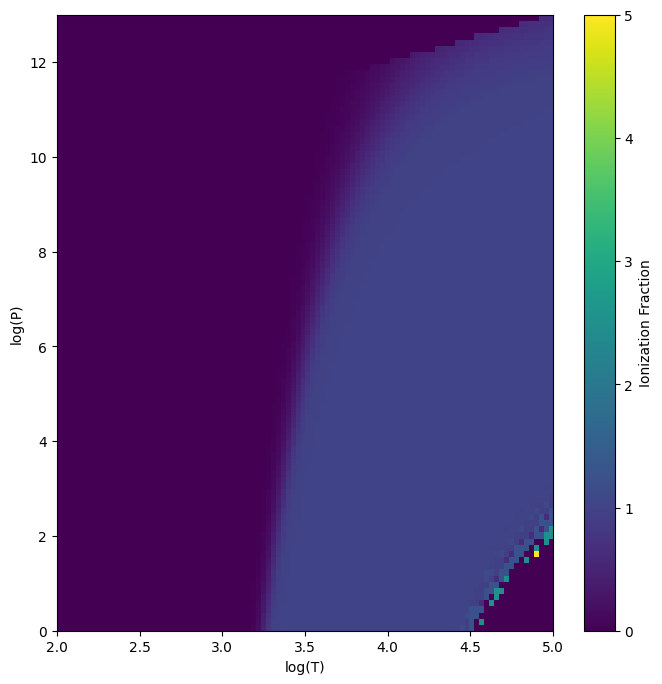

In [168]:
plt.figure(figsize=[8,8])
plt.imshow(x_matrix, origin='lower', interpolation="nearest", extent=[2, 5, 0, 13], aspect="auto")
plt.xlabel("log(T)")
plt.ylabel("log(P)")
plt.colorbar(label="Ionization Fraction")


In [ ]:
def x_HII(T, P):
    
    Z_elec_HI = 0
    E_ion = 13.6*u.eV
    n = 1
    n_max = ((const.k_B*T*u.K)**(1/3) / (2*((P*u.erg/u.cm**3)**(1/3))*const.a0))**(1/2)
    while n <= (n_max//1):
        Z_elec_HI += 4*(n)*np.exp((-E_ion*(1-(1/n**2))/ (const.k_B*T*u.K)))
        n += 1

    m_H = const.m_p + const.m_e
        
    C_T = (1/(P*) * (2*np.pi*const.k_B*T*u.K / (const.h**2))**(3/2) * (const.m_p * const.m_e / m_H)**(3/2) * (4/Z_H) * np.exp(-E_ion / (const.k_B * T*u.K))

    frac = (-C_T + (C_T**2 + 4*C_T)**(1/2)) / 2
    
    return frac    

In [98]:
# PT_flatten = np.array([pressure_array, temp_array]).flatten()

In [88]:
# x_matrix_interp = griddata((pressure_array, temp_array), x_matrix, (grid_P, grid_T))